## Predicting COVID-19 Mortality from County Parameters using Random Forest

### Project by Michele Waters

* Part 1: Data Exploration and Manipulation
* Part 2: Model Using Random Forest
* Part 3: Feature Importance
* Part 4: Inspect Highly Correlated Features
* Part 5: Evaluate and Optimize Features
* Part 6: Hyperparameter Tuning
* Part 7: Final Optimized Random Forest Models
* Part 8: Plotting Top 15 Features
* Part 9: Data Interpretation
* Part 10: General Recommendations


### Part 1: Data Exploration and Manipulation

In [402]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px

In [2]:
conn=sqlite3.connect('COVID19_county_data.db')
cursor= conn.cursor()

In [3]:
#Create function to query SQL data
def query_data(sql_statement):
    df=pd.read_sql(sql_statement, conn)
    #cursor.execute(sql_statement)
    return df.to_dict('records')

#### The following datasets cleaned and subsequently merged in SQL:
##### county_health, global_mobility, icu_capacity, county_area, hard_to_count, kinsa_fever, and weekly_confirmed_mortality_covid

In [5]:
#County Health Rankings Data, 2016-2018 estimates: county_health
county_health_df=pd.DataFrame(query_data('SELECT * FROM county_health'))
county_health_df.head()

,# Alcohol-Impaired Driving Deaths,# Alcohol-Impaired Driving Deaths_isna,# American Indian & Alaska Native,# Asian,# Black,# Chlamydia Cases,# Chlamydia Cases_isna,# Deaths_Premature age-adjusted mortality,# Deaths_Premature age-adjusted mortality_isna,# Deaths_Suicides,...,YPLL Rate (Asian)_isna,YPLL Rate (Black),YPLL Rate (Black)_isna,YPLL Rate (Hispanic),YPLL Rate (Hispanic)_isna,YPLL Rate (White),YPLL Rate (White)_isna,Years of Potential Life Lost Rate,Years of Potential Life Lost Rate_isna,id
0,15.0,0,267,681,10755,226.0,0,791.0,0,53.0,...,1,10201.0,0,0.0,1,7886.0,0,8129.0,0,1
1,48.0,0,1684,2508,19151,691.0,0,2967.0,0,207.0,...,1,9891.0,0,3570.0,0,7436.0,0,7354.0,0,2
2,12.0,0,164,113,11951,181.0,0,472.0,0,18.0,...,1,12422.0,0,0.0,1,8140.0,0,10254.0,0,3
3,8.0,0,98,53,4731,77.0,0,471.0,0,23.0,...,1,13085.0,0,0.0,1,12241.0,0,11978.0,0,4
4,14.0,0,378,185,846,136.0,0,1085.0,0,50.0,...,1,0.0,1,0.0,1,0.0,1,11335.0,0,5


In [13]:
# county_health_df.to_csv('county_health.csv')

In [6]:
#Global Mobility Data: global_mobility
global_mobility_df=pd.DataFrame(query_data('SELECT * FROM global_mobility'))
global_mobility_df.head()

,County_State,FIPS,country_region,country_region_code,date,day_of_week,grocery_and_pharmacy_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline_isna,id,parks_percent_change_from_baseline,...,residential_percent_change_from_baseline_isna,retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_isna,sub_region_1,sub_region_2,transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline_isna,weekend,workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline_isna
0,"('Autauga', 'Alabama')",01001,United States,US,2020-02-15 00:00:00,Saturday,7.0,0,0,0.0,...,1,5.0,0,Alabama,Autauga,0.0,1,1,-4.0,0
1,"('Autauga', 'Alabama')",01001,United States,US,2020-02-16 00:00:00,Sunday,1.0,0,1,-23.0,...,1,0.0,0,Alabama,Autauga,0.0,1,1,-4.0,0
2,"('Autauga', 'Alabama')",01001,United States,US,2020-02-17 00:00:00,Monday,0.0,0,2,0.0,...,0,8.0,0,Alabama,Autauga,0.0,1,0,-27.0,0
3,"('Autauga', 'Alabama')",01001,United States,US,2020-02-18 00:00:00,Tuesday,0.0,0,3,0.0,...,0,-2.0,0,Alabama,Autauga,0.0,1,0,2.0,0
4,"('Autauga', 'Alabama')",01001,United States,US,2020-02-19 00:00:00,Wednesday,0.0,0,4,0.0,...,0,-2.0,0,Alabama,Autauga,0.0,1,0,2.0,0


In [14]:
#global_mobility_df.to_csv('global_mobility.csv')

In [7]:
#ICU Capacity Data: icu_capacity
icu_capacity_df=pd.DataFrame(query_data('SELECT * FROM icu_capacity'))
icu_capacity_df.head()

,County,County_State,FIPS,ICU Beds,Percent of Population Aged 60+,Population Aged 60+,Residents Aged 60+ Per Each ICU Bed,Residents Aged 60+ Per Each ICU Bed_isna,State,Total Population,id
0,Autauga,"('Autauga', 'Alabama')",01001,6,19.1,10523,1754.000000,0,Alabama,55036,0
1,Baldwin,"('Baldwin', 'Alabama')",01003,51,26.3,53519,1049.000000,0,Alabama,203360,1
2,Barbour,"('Barbour', 'Alabama')",01005,5,23.5,6150,1230.000000,0,Alabama,26201,2
3,Bibb,"('Bibb', 'Alabama')",01007,0,21.1,4773,1299.560298,1,Alabama,22580,3
4,Blount,"('Blount', 'Alabama')",01009,6,23.6,13600,2267.000000,0,Alabama,57667,4


In [15]:
#icu_capacity_df.to_csv('icu_capacity.csv')

In [8]:
#County Area Data: county_area
county_area_df=pd.DataFrame(query_data('SELECT * FROM county_area'))
county_area_df.head()

,Areaname,FIPS,Land_Area_sq_mi_LND110200D,Total_Area_sq_mi_LND010190D,Water_Area_sq_miLND210190D,id
0,"Autauga, AL",01001,595.97,604.49,8.48,2
1,"Baldwin, AL",01003,1596.35,2027.08,430.55,3
2,"Barbour, AL",01005,884.90,904.59,19.59,4
3,"Bibb, AL",01007,623.03,625.50,3.14,5
4,"Blount, AL",01009,645.59,650.65,4.97,6


In [16]:
#county_area_df.to_csv('county_area.csv')

In [9]:
#Hard to Count Populations (Census return rates, foreign population, no internet): hard_to_count
hard_to_count_df=pd.DataFrame(query_data('SELECT * FROM hard_to_count'))
hard_to_count_df.head()

,FIPS,LowResponseScore,MailReturnRateCen2010,PctNoInternet_TotHHDenom,PctTotPopBornOutUS_TotPopDenom,id
0,01001,19.391667,82.741667,0.218865,0.018787,0
1,01003,15641.006250,15692.084375,0.172475,0.029703,1
2,01005,24.055556,76.122222,0.347161,0.022283,2
3,01007,20.625000,71.175000,0.280822,0.011627,3
4,01009,19.344444,83.022222,0.273604,0.047752,4


In [17]:
#hard_to_count_df.to_csv('hard_to_count.csv')

In [10]:
#Kinsa Fever Data: kinsa_fever
kinsa_fever_df=pd.DataFrame(query_data('SELECT * FROM kinsa_fever'))
kinsa_fever_df.tail()

,FIPS,anomaly_fevers,anomaly_fevers_isna,atypical_ili,atypical_ili_delta,atypical_ili_delta_isna,atypical_ili_isna,date,doy,forecast_expected,forecast_expected_isna,forecast_lower,forecast_lower_isna,forecast_upper,forecast_upper_isna,id,observed_ili,region_name,region_type,state
282914,56041,0.0,1,0.0,0.0,1,1,2020-05-16 00:00:00,137,0.001753,0,0.0,0,0.852953,0,307602,0.000000,Uinta,county,WY
282915,56031,0.0,1,0.0,0.0,1,1,2020-05-16 00:00:00,137,0.001609,0,0.0,0,0.796550,0,307603,0.127325,Platte,county,WY
282916,56039,0.0,1,0.0,0.0,1,1,2020-05-16 00:00:00,137,0.001756,0,0.0,0,0.847568,0,307604,0.010316,Teton,county,WY
282917,56013,0.0,0,0.0,0.0,0,1,2020-05-16 00:00:00,137,0.001706,0,0.0,0,0.845707,0,307605,0.000000,Fremont,county,WY
282918,56001,0.0,1,0.0,0.0,1,1,2020-05-16 00:00:00,137,0.001470,0,0.0,0,0.827514,0,307606,0.000000,Albany,county,WY


In [18]:
#kinsa_fever_df.to_csv('kinsa_fever.csv')

In [11]:
#Subset of COVID-19 Confirmed & Mortality Cases JHU Data, by month: monthly_mortality_covid
weekly_confirmed_mortality_df=pd.DataFrame(query_data('SELECT * FROM weekly_confirmed_mortality_covid'))
weekly_confirmed_mortality_df.iloc[10:17]

,Confirmed_Count,Confirmed_Count_Log,County,"County, State",Date,FIPS,Mortality_Count,Mortality_Count_Log,Percent_Mortality,Population,State,index
10,12.0,1.079181,Autauga,"Autauga, Alabama, US",2020-04-03 00:00:00,1001,0.0,0.000000,0.000000,55869,Alabama,72
11,17.0,1.230449,Autauga,"Autauga, Alabama, US",2020-04-10 00:00:00,1001,1.0,0.000000,5.882353,55869,Alabama,79
12,26.0,1.414973,Autauga,"Autauga, Alabama, US",2020-04-17 00:00:00,1001,2.0,0.301030,7.692308,55869,Alabama,86
13,36.0,1.556303,Autauga,"Autauga, Alabama, US",2020-04-24 00:00:00,1001,2.0,0.301030,5.555556,55869,Alabama,93
14,42.0,1.623249,Autauga,"Autauga, Alabama, US",2020-05-01 00:00:00,1001,3.0,0.477121,7.142857,55869,Alabama,100
15,67.0,1.826075,Autauga,"Autauga, Alabama, US",2020-05-08 00:00:00,1001,4.0,0.602060,5.970149,55869,Alabama,107
16,103.0,2.012837,Autauga,"Autauga, Alabama, US",2020-05-15 00:00:00,1001,4.0,0.602060,3.883495,55869,Alabama,114


In [19]:
#weekly_confirmed_mortality_df.to_csv('weekly_confirmed_mortality.csv')

#### Merged Data:

In [76]:
#Get cleaned data, with object columns dropped; datasets were merged on county FIPS and date columns
df=pd.DataFrame(query_data('SELECT * FROM clean_weekly_confirmed_mortality_county_data'))

In [77]:
#df.to_csv('ML_merged_weekly_covid_county_data.csv')

In [78]:
df.head()

,# Alcohol-Impaired Driving Deaths,# Alcohol-Impaired Driving Deaths_isna,# American Indian & Alaska Native,# Asian,# Black,# Chlamydia Cases,# Chlamydia Cases_isna,# Deaths_Premature age-adjusted mortality,# Deaths_Premature age-adjusted mortality_isna,# Deaths_Suicides,...,parks_percent_change_from_baseline_isna,residential_percent_change_from_baseline,residential_percent_change_from_baseline_isna,retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_isna,transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline_isna,weekend,workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline_isna
0,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,0.0,0.0,-3.0,0.0,0.0,1.0,0.0,3.0,0.0
1,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,-2.0,0.0,12.0,0.0,0.0,1.0,0.0,2.0,0.0
2,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,-1.0,0.0,4.0,0.0,0.0,1.0,0.0,4.0,0.0
3,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,-2.0,0.0,8.0,0.0,0.0,1.0,0.0,3.0,0.0
4,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,14.0,0.0,-24.0,0.0,0.0,1.0,0.0,-29.0,0.0


In [79]:
df=df.drop(columns=['id', 'index'])

In [80]:
column_names=list(df.columns)
column_names

['# Alcohol-Impaired Driving Deaths',
 '# Alcohol-Impaired Driving Deaths_isna',
 '# American Indian & Alaska Native',
 '# Asian',
 '# Black',
 '# Chlamydia Cases',
 '# Chlamydia Cases_isna',
 '# Deaths_Premature age-adjusted mortality',
 '# Deaths_Premature age-adjusted mortality_isna',
 '# Deaths_Suicides',
 '# Deaths_Suicides_isna',
 '# Dentists',
 '# Dentists_isna',
 '# Driving Deaths',
 '# Driving Deaths_isna',
 '# Drug Overdose Deaths',
 '# Drug Overdose Deaths_isna',
 '# Firearm Fatalities',
 '# Firearm Fatalities_isna',
 '# Food Insecure',
 '# HIV Cases',
 '# HIV Cases_isna',
 '# Hispanic',
 '# Homeowners',
 '# Households',
 '# Households with Severe Cost Burden',
 '# Households with Severe Cost Burden_isna',
 '# Households_isna',
 '# Injury Deaths',
 '# Injury Deaths_isna',
 '# Limited Access_Limited access to healthy foods',
 '# Limited Access_Limited access to healthy foods_isna',
 '# Mental Health Providers',
 '# Mental Health Providers_isna',
 '# Motor Vehicle Deaths',
 '#

In [81]:
#Make sure there are no NaN values
df.isna().sum().sort_values(ascending=False)[:5]

workplaces_percent_change_from_baseline_isna    0
Average Grade Performance (Hispanic).1          0
% less than 18 years of age                     0
20th Percentile Income                          0
20th Percentile Income_isna                     0
dtype: int64

In [82]:
#Make sure there are all numeric columns
df.dtypes.value_counts()

float64    519
dtype: int64

#### Identify target columns

In [83]:
weekly_confirmed_mortality_df.columns

Index(['Confirmed_Count', 'Confirmed_Count_Log', 'County', 'County, State',
       'Date', 'FIPS', 'Mortality_Count', 'Mortality_Count_Log',
       'Percent_Mortality', 'Population', 'State', 'index'],
      dtype='object')

In [84]:
#Find columns in both confirmed cases/mortality data and ML dataset/df
[col for col in  weekly_confirmed_mortality_df.columns if col in df.columns]

['Confirmed_Count',
 'Confirmed_Count_Log',
 'FIPS',
 'Mortality_Count',
 'Mortality_Count_Log',
 'Percent_Mortality',
 'Population']

In [85]:
kinsa_fever_df.columns

Index(['FIPS', 'anomaly_fevers', 'anomaly_fevers_isna', 'atypical_ili',
       'atypical_ili_delta', 'atypical_ili_delta_isna', 'atypical_ili_isna',
       'date', 'doy', 'forecast_expected', 'forecast_expected_isna',
       'forecast_lower', 'forecast_lower_isna', 'forecast_upper',
       'forecast_upper_isna', 'id', 'observed_ili', 'region_name',
       'region_type', 'state'],
      dtype='object')

In [86]:
#Find columns in both kinsa fever data and ML dataset/df
[col for col in  kinsa_fever_df.columns if col in df.columns]

['FIPS',
 'anomaly_fevers',
 'anomaly_fevers_isna',
 'atypical_ili',
 'atypical_ili_delta',
 'atypical_ili_delta_isna',
 'atypical_ili_isna',
 'doy',
 'forecast_expected',
 'forecast_expected_isna',
 'forecast_lower',
 'forecast_lower_isna',
 'forecast_upper',
 'forecast_upper_isna',
 'observed_ili']

In [87]:
#Creat list of possible target columns and kinsa columns to drop, with exception of observed illness and doy
target_drop_cols=['Confirmed_Count', 'Confirmed_Count_Log', 'Mortality_Count', 'Mortality_Count_Log', 
           'Percent_Mortality', 'anomaly_fevers', 'anomaly_fevers_isna', 'atypical_ili',
          'atypical_ili_delta', 'atypical_ili_delta_isna', 'atypical_ili_isna','forecast_expected',
           'forecast_expected_isna','forecast_lower','forecast_lower_isna','forecast_upper','forecast_upper_isna',]

In [91]:
#Assign feature columns to X
X=df.drop(columns=target_drop_cols)

In [92]:
X.head()

,# Alcohol-Impaired Driving Deaths,# Alcohol-Impaired Driving Deaths_isna,# American Indian & Alaska Native,# Asian,# Black,# Chlamydia Cases,# Chlamydia Cases_isna,# Deaths_Premature age-adjusted mortality,# Deaths_Premature age-adjusted mortality_isna,# Deaths_Suicides,...,parks_percent_change_from_baseline_isna,residential_percent_change_from_baseline,residential_percent_change_from_baseline_isna,retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_isna,transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline_isna,weekend,workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline_isna
0,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,0.0,0.0,-3.0,0.0,0.0,1.0,0.0,3.0,0.0
1,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,-2.0,0.0,12.0,0.0,0.0,1.0,0.0,2.0,0.0
2,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,-1.0,0.0,4.0,0.0,0.0,1.0,0.0,4.0,0.0
3,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,-2.0,0.0,8.0,0.0,0.0,1.0,0.0,3.0,0.0
4,15.0,0.0,267.0,681.0,10755.0,226.0,0.0,791.0,0.0,53.0,...,1.0,14.0,0.0,-24.0,0.0,0.0,1.0,0.0,-29.0,0.0


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32836 entries, 0 to 32835
Columns: 502 entries, # Alcohol-Impaired Driving Deaths to workplaces_percent_change_from_baseline_isna
dtypes: float64(502)
memory usage: 125.8 MB


In [247]:
#Assign one of target columns to y; using 'Mortality_Count_Log' as target (i.e log(# COVID-19 Deaths) per county)
y_options=df[['Confirmed_Count','Confirmed_Count_Log', 'Mortality_Count', 'Mortality_Count_Log', 'Percent_Mortality']]
y=y_options[['Mortality_Count_Log']]
y[6:10]

,Mortality_Count_Log
6,0.00000
7,0.00000
8,0.30103
9,0.30103


#### Convert day of year (doy) to actual date, and create date dictionary for post-analysis

In [248]:
#Will keep doy and convert day of year back to date following analysis
import datetime
def convert_doy(day_col=df['doy']):
    date_list=[]
    for day in day_col:
        date=datetime.date(2020,1,1) + datetime.timedelta(day-1)
        date_list.append(date.strftime("%m/%d/%y"))
    return date_list


In [249]:
dates=convert_doy()
dates[-3:]

['05/01/20', '05/08/20', '05/15/20']

In [250]:
unique_dates=pd.Series(dates).unique()
unique_dates

array(['02/21/20', '02/28/20', '03/06/20', '03/13/20', '03/20/20',
       '03/27/20', '04/03/20', '04/10/20', '04/17/20', '04/24/20',
       '05/01/20', '05/08/20', '05/15/20'], dtype=object)

In [251]:
doys=df['doy'].unique()
doys

array([ 52.,  59.,  66.,  73.,  80.,  87.,  94., 101., 108., 115., 122.,
       129., 136.])

In [252]:
date_dict={}
for i in range(len(unique_dates)):
    date_dict[doys[i]]=unique_dates[i]
date_dict

{52.0: '02/21/20',
 59.0: '02/28/20',
 66.0: '03/06/20',
 73.0: '03/13/20',
 80.0: '03/20/20',
 87.0: '03/27/20',
 94.0: '04/03/20',
 101.0: '04/10/20',
 108.0: '04/17/20',
 115.0: '04/24/20',
 122.0: '05/01/20',
 129.0: '05/08/20',
 136.0: '05/15/20'}

#### Split data (by date) into train, validate, and test data

In [253]:
train_doys=list(date_dict.keys())[:-2]
train_doys

[52.0, 59.0, 66.0, 73.0, 80.0, 87.0, 94.0, 101.0, 108.0, 115.0, 122.0]

In [254]:
validate_doy=list(date_dict.keys())[-2]
validate_doy

129.0

In [255]:
test_doy=list(date_dict.keys())[-1]
test_doy

136.0

In [258]:
#Separate X_train and y_train by early dates
X_train=X[X['doy'].isin(train_doys)]
#X_train[['doy']][:12]
y_train=y.iloc[X_train.index]['Mortality_Count_Log']
#y_train[:12]

In [259]:
#Assign X_validate & y_validate
X_validate=X[X['doy']==validate_doy]
y_validate=y.iloc[X_validate.index]['Mortality_Count_Log']
#X_validate.head()['doy']

In [260]:
#Assign X_test & y_test
X_test=X[X['doy']==test_doy]
y_test=y.iloc[X_test.index]['Mortality_Count_Log']
#X_test.head()['doy']

In [261]:
X_train.shape, X_validate.shape, X_test.shape

((27795, 502), (2524, 502), (2517, 502))

### Part 2: Model Using Random Forest

In [262]:
from sklearn.ensemble import RandomForestRegressor

In [263]:
#Train Random Forest model
rfr=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [264]:
#Compute model score (coefficient of determination R^2 of the prediction)
rfr.score(X_validate, y_validate)

0.9219911806425299

In [266]:
#Get predictions from model
y_predict=pd.Series(rfr.predict(X_validate), index=y_validate.index, name='Mortality_Count_Log')

In [268]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [269]:
#Compute root mean squared logarithmic error; used exponent on y to transform original log(mortality) data
np.sqrt(mean_squared_log_error(np.exp(y_validate), np.exp(y_predict)))

0.12785106520517614

The random forest model was able to predict the validation data with a score of 0.923 (i.e. 92 percent of the variance in log(Mortality_Count_Log) is predictable from features) and root mean squared logarithmic error of 0.128.

### Part 3: Feature Importance

Compare feature importance using eli5 and sklearn

In [270]:
#eli5 feature importance
from eli5.sklearn import PermutationImportance
import eli5

In [271]:
perm = PermutationImportance(rfr).fit(X_validate, y_validate)
exp_df = eli5.explain_weights_df(perm, feature_names = list(X_validate.columns))

In [477]:
#Ranked Features from eli5
exp_df[:35]

,feature,weight,std
0,# Single-Parent Households,0.148617,0.003415
1,residential_percent_change_from_baseline,0.131788,0.005246
2,# Households with Severe Cost Burden,0.075262,0.002594
3,# Black,0.066417,0.002342
4,# Unemployed,0.038608,0.001034
5,# Homeowners,0.034862,0.000872
6,# Drug Overdose Deaths,0.023137,0.000432
7,# HIV Cases,0.017226,0.000801
8,Air pollution_particulate matter_Average Daily...,0.015872,0.000875
9,Child mortality_# Deaths,0.012443,0.000737


In [489]:
#Get top 35 features from eli5
eli5_ranked_features=np.array(exp_df.feature)
top_eli5_features=eli5_top_features[:50]
top_eli5_features[:5]

['# Single-Parent Households',
 'residential_percent_change_from_baseline',
 '# Households with Severe Cost Burden',
 '# Black',
 '# Unemployed']

In [490]:
eli5_rfr=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train[top_eli5_features], y_train)

In [491]:
eli5_rfr.score(X_validate[top_eli5_features], y_validate)

0.6032242378202592

The top eli5 features only account for ~60 percent of the variance. The features don't include doy (day of year) an important feature. Let's check feature importance from the model.

In [492]:
#Get top 50 features from sklearn
feat_importances = rfr.feature_importances_
indices = np.argsort(feat_importances)[::-1]
sk_ranked_features=X_train.columns[indices]
top_sk_features=list(sk_ranked_features[:50])
top_sk_features[:5]

['residential_percent_change_from_baseline',
 'doy',
 '# Households with Severe Cost Burden',
 '# Single-Parent Households',
 '# Unemployed']

In [519]:
sk_df=pd.DataFrame({'Top Features':top_sk_features[:25][::-1], 'Relative Importance': feat_importances[indices][:25][::-1]})

In [520]:
sk_fig=px.bar(sk_df, y='Top Features', x='Relative Importance', orientation='h')
sk_fig.show()

In [493]:
sk_rfr=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train[top_sk_features], y_train)

In [494]:
sk_rfr.score(X_validate[top_sk_features], y_validate)

0.9133893366385681

The top sklearn features account for ~91 percent of the variance. Let's compare features

Compare eli5 and sklearn top features list

In [495]:
set(top_eli5_features).difference(set(top_sk_features))

{'# Mental Health Providers',
 '# Not Proficient in English',
 '# Workers who Drive Alone_Long commute - driving alone',
 '% Adults with Obesity',
 '% American Indian & Alaska Native',
 '% Screened (Black)',
 '% Vaccinated (Black)',
 'Child Mortality Rate (Hispanic)',
 'Drug Overdose Mortality Rate (Hispanic)',
 'Household Income (Hispanic)',
 'Life Expectancy (Asian)',
 'Preventable Hosp. Rate (Hispanic)',
 'Primary Care Physicians Rate',
 'Primary Care Physicians Ratio',
 'State_x0_Indiana',
 'Suicide Rate (Age-Adjusted)'}

In [496]:
set(top_sk_features).difference(set(top_eli5_features))

{'# Dentists',
 '# Driving Deaths',
 '% Adults with Diabetes',
 '% Driving Deaths with Alcohol Involvement',
 '% Severe Housing Problems',
 'Annual Average Violent Crimes',
 'Overcrowding',
 'PctTotPopBornOutUS_TotPopDenom',
 'Social Association Rate',
 'Water_Area_sq_miLND210190D',
 'doy',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'observed_ili',
 'parks_percent_change_from_baseline',
 'retail_and_recreation_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline'}

The two sets of features differ by 20 features (including doy). Let's use the union of the two sets of features.

In [497]:
union_features=list(set(top_sk_features).union(set(top_eli5_features)))

In [498]:
len(union_features)

66

In [499]:
rfr2=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train[union_features], y_train)

In [500]:
rfr2.score(X_validate[union_features], y_validate)

0.9164479885056036

We improved our score slightly using the union of the top features. 
Let's redo feature importance using eli5, which generally performs better with less features

### Part 4: Inspect Highly Correlated Features

In [501]:
import seaborn as sns

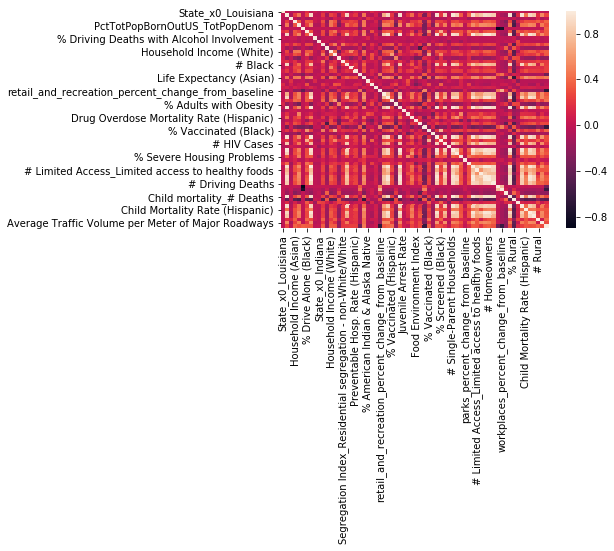

In [563]:
sns.heatmap(X_train[union_features].corr())

In [548]:
#Pearson correlation coefficient
pearson_corr_df = X_validate[union_features].corr().abs()

In [549]:
pearson_corr_df.iloc[:5, :5]

,State_x0_Louisiana,# Chlamydia Cases,Suicide Rate (Age-Adjusted),Household Income (Asian),PctTotPopBornOutUS_TotPopDenom
State_x0_Louisiana,1.000000,0.008466,0.017360,0.015688,0.047012
# Chlamydia Cases,0.008466,1.000000,0.073711,0.228604,0.468775
Suicide Rate (Age-Adjusted),0.017360,0.073711,1.000000,0.014557,0.129124
Household Income (Asian),0.015688,0.228604,0.014557,1.000000,0.318046
PctTotPopBornOutUS_TotPopDenom,0.047012,0.468775,0.129124,0.318046,1.000000


In [550]:
pearson_corr_df.shape

(66, 66)

In [624]:
#Create/apply mask for upper triangle of matrix
mask=np.triu(np.ones_like(pearson_corr_df, dtype=bool))
mask_df= pearson_corr_df.mask(mask)
#mask_df

,State_x0_Louisiana,# Chlamydia Cases,Suicide Rate (Age-Adjusted),Household Income (Asian),PctTotPopBornOutUS_TotPopDenom,doy,% Drive Alone (Black),Population Aged 60+,% Driving Deaths with Alcohol Involvement,State_x0_Indiana,...,Child mortality_# Deaths,% Rural,Air pollution_particulate matter_Average Daily PM2.5,Annual Average Violent Crimes,Child Mortality Rate (Hispanic),# Dentists,# Mental Health Providers,# Rural,Average Traffic Volume per Meter of Major Roadways,residential_percent_change_from_baseline
State_x0_Louisiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# Chlamydia Cases,0.008466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Suicide Rate (Age-Adjusted),0.017360,0.073711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Household Income (Asian),0.015688,0.228604,0.014557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PctTotPopBornOutUS_TotPopDenom,0.047012,0.468775,0.129124,0.318046,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% Drive Alone (Black),0.147172,0.265539,0.103566,0.328110,0.240749,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Population Aged 60+,0.011490,0.913763,0.062574,0.316487,0.538762,NaN,0.311713,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
% Driving Deaths with Alcohol Involvement,0.046632,0.007592,0.039197,0.031485,0.060760,NaN,0.020824,0.008005,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State_x0_Indiana,0.025461,0.020830,0.000527,0.015301,0.070857,NaN,0.063217,0.030286,0.135607,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [615]:
#Get highly correlated columns
high_corr_cols=[col for col in mask_df.columns if any(mask_df[col]>0.70)]

In [616]:
high_corr_cols

['# Chlamydia Cases',
 '% Drive Alone (Black)',
 'Population Aged 60+',
 '# Black',
 'retail_and_recreation_percent_change_from_baseline',
 'High school graduation_Cohort Size',
 '# Social Associations',
 '# Unemployed',
 '% Vaccinated (Black)',
 '# Households with Severe Cost Burden',
 '# HIV Cases',
 '# Single-Parent Households',
 '# Drug Overdose Deaths',
 'Total Population',
 '# Limited Access_Limited access to healthy foods',
 '# Not Proficient in English',
 '# Workers who Drive Alone_Long commute - driving alone',
 '# Homeowners',
 '# Driving Deaths',
 'Child mortality_# Deaths',
 'Annual Average Violent Crimes',
 '# Dentists']

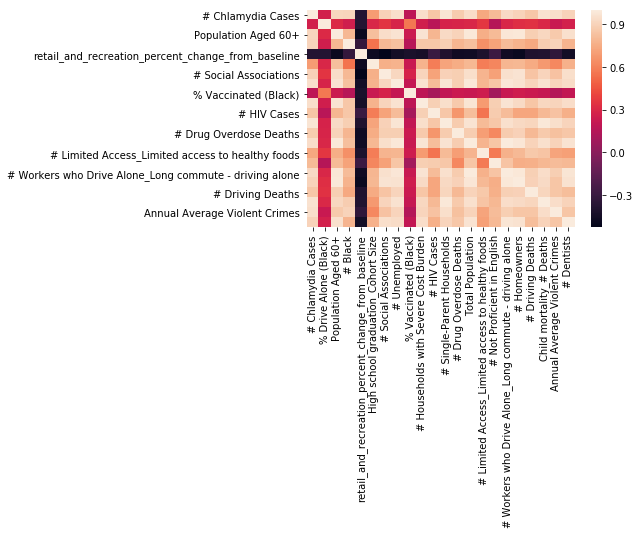

In [617]:
#Plot highly correlated columns
sns.heatmap(X_validate[high_corr_cols].corr())

In [618]:
X_validate[high_corr_cols].corr()

,# Chlamydia Cases,% Drive Alone (Black),Population Aged 60+,# Black,retail_and_recreation_percent_change_from_baseline,High school graduation_Cohort Size,# Social Associations,# Unemployed,% Vaccinated (Black),# Households with Severe Cost Burden,...,# Drug Overdose Deaths,Total Population,# Limited Access_Limited access to healthy foods,# Not Proficient in English,# Workers who Drive Alone_Long commute - driving alone,# Homeowners,# Driving Deaths,Child mortality_# Deaths,Annual Average Violent Crimes,# Dentists
# Chlamydia Cases,1.000000,0.265539,0.913763,0.908054,-0.379484,0.694334,0.894977,0.946437,0.185075,0.951489,...,0.872935,0.943876,0.733567,0.805691,0.932896,0.900738,0.851199,0.960384,0.950840,0.900323
% Drive Alone (Black),0.265539,1.000000,0.311713,0.257267,-0.376796,0.300796,0.353004,0.290281,0.569248,0.259631,...,0.289743,0.301534,0.359903,0.154605,0.299153,0.331271,0.341391,0.306366,0.229115,0.269881
Population Aged 60+,0.913763,0.311713,1.000000,0.793222,-0.484015,0.822147,0.945742,0.965951,0.235000,0.967127,...,0.902326,0.983982,0.756070,0.808866,0.978669,0.982191,0.886787,0.918089,0.866874,0.956877
# Black,0.908054,0.257267,0.793222,1.000000,-0.320202,0.550073,0.799606,0.827763,0.163677,0.855035,...,0.787973,0.824794,0.649095,0.714057,0.815096,0.778501,0.740753,0.880635,0.899721,0.779704
retail_and_recreation_percent_change_from_baseline,-0.379484,-0.376796,-0.484015,-0.320202,1.000000,-0.473911,-0.525165,-0.446291,-0.416210,-0.434882,...,-0.462633,-0.457509,-0.400844,-0.282373,-0.459768,-0.487838,-0.397888,-0.392056,-0.328908,-0.447191
High school graduation_Cohort Size,0.694334,0.300796,0.822147,0.550073,-0.473911,1.000000,0.762684,0.777459,0.226332,0.779333,...,0.751649,0.793994,0.585733,0.614350,0.788753,0.796225,0.748799,0.682754,0.623066,0.768780
# Social Associations,0.894977,0.353004,0.945742,0.799606,-0.525165,0.762684,1.000000,0.920781,0.282124,0.908819,...,0.881297,0.948757,0.781361,0.709852,0.956754,0.964673,0.840052,0.910110,0.837868,0.948380
# Unemployed,0.946437,0.290281,0.965951,0.827763,-0.446291,0.777459,0.920781,1.000000,0.212433,0.961732,...,0.886502,0.985089,0.786923,0.845489,0.976513,0.962807,0.905917,0.959050,0.910543,0.936891
% Vaccinated (Black),0.185075,0.569248,0.235000,0.163677,-0.416210,0.226332,0.282124,0.212433,1.000000,0.189269,...,0.234013,0.223315,0.244436,0.092056,0.223723,0.252961,0.232448,0.216292,0.151291,0.202253
# Households with Severe Cost Burden,0.951489,0.259631,0.967127,0.855035,-0.434882,0.779333,0.908819,0.961732,0.189269,1.000000,...,0.865619,0.975789,0.688883,0.882544,0.967951,0.930600,0.849479,0.916908,0.908776,0.945092


In [620]:
num_corrs=(X_validate[high_corr_cols].corr()>0.7).sum().sort_values(ascending=False)
num_corrs

# Dentists                                                19
Population Aged 60+                                       19
# Driving Deaths                                          19
# Homeowners                                              19
# Workers who Drive Alone_Long commute - driving alone    19
# Social Associations                                     19
# Unemployed                                              19
Total Population                                          19
# Single-Parent Households                                19
Annual Average Violent Crimes                             18
# Households with Severe Cost Burden                      18
# Chlamydia Cases                                         18
Child mortality_# Deaths                                  18
# Black                                                   17
# Drug Overdose Deaths                                    16
# Not Proficient in English                               16
# HIV Cases             

In [621]:
#Remove highly correlated columns not likely to affect analysis
corr_drop_cols=['Annual Average Violent Crimes', '# Driving Deaths', '# Not Proficient in English', '# Dentists', 'High school graduation_Cohort Size']

In [622]:
X_ds=X_train[union_features].drop(columns=corr_drop_cols)

In [623]:
rfr_ds=RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_ds, y_train)
rfr_ds.score(X_validate[union_features].drop(columns=corr_drop_cols), y_validate)

0.917498975198631

### Part 5: Evaluate and Optimize Features

Let's 1) look at the top features for sklearn and eli5. 2) look at the union of features using threshold/SelectFromModel to optimize the score. 3) Rank the features based on the consensus between sklearn and eli5 permutation importance

In [633]:
select_features=list(X_ds.columns)
len(select_features)

61

In [630]:
X_train_s = X_train[select_features]
X_validate_s = X_validate[select_features]
X_test_s = X_test[select_features]

In [635]:
from sklearn.feature_selection import SelectFromModel

In [693]:
#Get top 50 features from sklearn
feat_importances2 = rfr_ds.feature_importances_
indices2 = np.argsort(feat_importances2)[::-1]
sk_ranked_features2=X_train_s.columns[indices2]
sk_ranked_features2[:5]

Index(['residential_percent_change_from_baseline', 'doy',
       '# Households with Severe Cost Burden', '# Single-Parent Households',
       '# Unemployed'],
      dtype='object')

In [681]:
len(feat_importances2[indices2])

61

In [766]:
from sklearn.feature_selection import SelectFromModel

In [776]:
#************
sel = SelectFromModel(rfr_ds, threshold=0.01, prefit=True)
X_trans = sel.transform(X_train_s)
feature_idx = sel.get_support()
feature_name = X_train_s.columns[feature_idx]
feature_name

Index(['# Chlamydia Cases', 'doy', 'Population Aged 60+', '# Black',
       '# Unemployed', '# Households with Severe Cost Burden', '# HIV Cases',
       '# Single-Parent Households', '# Drug Overdose Deaths', '# Homeowners',
       'observed_ili', 'workplaces_percent_change_from_baseline',
       'Child mortality_# Deaths', 'residential_percent_change_from_baseline'],
      dtype='object')

In [771]:
#****
perm_ds = PermutationImportance(rfr_ds).fit(X_validate_s, y_validate)
exp_df_ds = eli5.explain_weights_df(perm_ds, feature_names = list(X_validate_s.columns))

In [773]:
exp_df_ds[:5]

,feature,weight,std
0,# Single-Parent Households,0.142277,0.002605
1,residential_percent_change_from_baseline,0.129037,0.005747
2,# Black,0.088950,0.002317
3,# Households with Severe Cost Burden,0.079499,0.003360
4,# Unemployed,0.055257,0.000754


In [778]:
#****
thresh=np.arange(0, 0.1, 0.0001)[::-1]
feature_names_perm={}
feature_names_mod={}
feature_perm_mod_int={}
feature_perm_mod_diff={}
feature_perm_mod_un={}
feature_int_list=[]
feature_diff_list=[]
feature_un_list=[]
for i in thresh:
    sel_1_1=SelectFromModel(perm_ds, threshold=i, prefit=True)
    X_trans_1_1 = sel_1_1.transform(X_train_s)
    feature_idx_1_1 = sel_1_1.get_support()
    feature_name_1_1 = X_train_s.columns[feature_idx_1_1]
    features_1_1=list(feature_name_1_1)
    feature_names_perm[i]= features_1_1
    
    sel_2_1 = SelectFromModel(rfr_ds, threshold=i, prefit=True)
    X_trans_2_1 = sel_2_1.transform(X_train_s)
    feature_idx_2_1 = sel_2_1.get_support()
    feature_name_2_1 = X_train_s.columns[feature_idx_2_1]
    features_2_1=list(feature_name_2_1)
    feature_names_mod[i]= features_2_1
    feature_perm_mod_int[i]=list(set(features_1_1).intersection(set(features_2_1)))
    feature_perm_mod_diff[i]=list(set(features_1_1).difference(set(features_2_1)))+list(set(features_2_1).difference(set(features_1_1)))
    feature_perm_mod_un[i]=list(set(features_1_1).union(set(features_2_1)))
    feature_int_list.append({f'{i}': feature_perm_mod_int[i]})
    feature_diff_list.append({f'{i}': feature_perm_mod_diff[i]})
    feature_un_list.append({f'{i}': feature_perm_mod_un[i]})

In [779]:
un_feat=[]
key_lengths={}
lengths=[]
for dict_f in feature_un_list:
    for key in dict_f.keys():
        length=len(dict_f[key])
        if (length) not in lengths:
            lengths.append(length)
            key_lengths[length]=key, dict_f[key]
            un_feat.append({f'{length}': key_lengths[length][1]})
    

In [813]:
#First 22 models, under 25 features
un_feat[:23]

[{'3': ['residential_percent_change_from_baseline',
   'doy',
   '# Single-Parent Households']},
 {'4': ['# Single-Parent Households',
   'residential_percent_change_from_baseline',
   'doy',
   '# Households with Severe Cost Burden']},
 {'5': ['# Single-Parent Households',
   '# Black',
   'residential_percent_change_from_baseline',
   'doy',
   '# Households with Severe Cost Burden']},
 {'6': ['# Single-Parent Households',
   '# Unemployed',
   'doy',
   '# Black',
   'residential_percent_change_from_baseline',
   '# Households with Severe Cost Burden']},
 {'7': ['# Households with Severe Cost Burden',
   '# Single-Parent Households',
   '# Unemployed',
   'doy',
   '# Black',
   'residential_percent_change_from_baseline',
   '# Homeowners']},
 {'8': ['# Single-Parent Households',
   '# Drug Overdose Deaths',
   '# Unemployed',
   'doy',
   '# Homeowners',
   '# Black',
   'residential_percent_change_from_baseline',
   '# Households with Severe Cost Burden']},
 {'9': ['# Single-Paren

In [843]:
models_unf = [RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1).fit(X_train_s[list(features.values())[0]], y_train) for features in un_feat[:23]]

In [844]:
scores_unf=[models_unf[i].score(X_validate_s[list(un_feat[i].values())[0]], y_validate) for i in range(len(models_unf))]

In [845]:
scores_unf_df=pd.DataFrame({'index': range(len(models_unf)), 'scores':scores_unf})

In [846]:
fig_unf=px.line(scores_unf_df, x='index', y='scores')
fig_unf.show()

The highest score occurs at index 12 of the set of consensus features, which includes 15 features

In [842]:
#Index 12 of union of sklearn and eli5 features; includes 15 features:
un_feat[12]

{'15': ['# Unemployed',
  'Child mortality_# Deaths',
  'Air pollution_particulate matter_Average Daily PM2.5',
  '# Black',
  '# Households with Severe Cost Burden',
  '# HIV Cases',
  'FIPS',
  '# Single-Parent Households',
  '# Drug Overdose Deaths',
  '% Drive Alone (Black)',
  'doy',
  'Population Aged 60+',
  'residential_percent_change_from_baseline',
  '# Workers who Drive Alone_Long commute - driving alone',
  '# Homeowners']}

In [847]:
#Get differences between the sets of features
feature_set_diffs=[]
for i in range(0, len(un_feat)):
    if i==0:
        feature_set_diffs.append([i, list(un_feat[i].values())[0]])
    elif i>0:
        set_feat=list(set(list(un_feat[i].values())[0]).difference(set(list(un_feat[i-1].values())[0])))[0]
        feature_set_diffs.append([i, [set_feat]])

In [884]:
#Get differences between the first set of 12 features to determine feature rankings
feature_set_diffs[:13]

[[0,
  ['residential_percent_change_from_baseline',
   'doy',
   '# Single-Parent Households']],
 [1, ['# Households with Severe Cost Burden']],
 [2, ['# Black']],
 [3, ['# Unemployed']],
 [4, ['# Homeowners']],
 [5, ['# Drug Overdose Deaths']],
 [6, ['Air pollution_particulate matter_Average Daily PM2.5']],
 [7, ['Population Aged 60+']],
 [8, ['# Workers who Drive Alone_Long commute - driving alone']],
 [9, ['# HIV Cases']],
 [10, ['Child mortality_# Deaths']],
 [11, ['% Drive Alone (Black)']],
 [12, ['FIPS']]]

In [890]:
#Assemble list of final ranked features
ranked_features=[]
rank=1
for feats in feature_set_diffs[:13]:
    for feat in feats[1]:
        ranked_features.append({'rank': rank, 'feature':feat})
        rank+=1
ranked_features_df=pd.DataFrame(ranked_features)
ranked_f_list=list(ranked_features_df['feature'])
ranked_features_df

,feature,rank
0,residential_percent_change_from_baseline,1
1,doy,2
2,# Single-Parent Households,3
3,# Households with Severe Cost Burden,4
4,# Black,5
5,# Unemployed,6
6,# Homeowners,7
7,# Drug Overdose Deaths,8
8,Air pollution_particulate matter_Average Daily...,9
9,Population Aged 60+,10


Let's make sure the feature score is optimized

In [891]:
#Function to interatively get score given a set number of features (from low to high index, using step)
def optimize_feature_score(X_train=X_train_u, X_validate=X_validate_u,y_train=y_train, y_validate=y_validate, feature_importance_df=exp_df2, feature_col='feature', low_index=1, high_index=10, step=2, mode='optimum'):
    optimal_features_score=[]
    for i in range(low_index,high_index, step):
        top_features=feature_importance_df[feature_col][0:i].values
        rfr=RandomForestRegressor(n_estimators=20, random_state=42, n_jobs=-1)
        score=rfr.fit(X_train[top_features], y_train).score(X_validate[top_features], y_validate)
        optimal_features_score.append((i, round(score, 3), top_features[-1]))
        opt_score=max(optimal_features_score, key = lambda x : x[1])
        scores_df=pd.DataFrame(optimal_features_score, columns=['Number of features', 'Scores', 'Added feature'])
        scores_df['Score Diff']=scores_df['Scores'].diff()
        scores_df.index=pd.RangeIndex(1,len(scores_df)+1)
        min_change=scores_df['Score Diff'][np.abs(scores_df['Score Diff'])==np.abs(scores_df['Score Diff']).min()]
        opt_message=f"The optimum number of top features is {opt_score[0]}, with a score of {opt_score[1]}"
        min_message=f"The minimum change in top features score is {list(min_change.values)}, with a feature number of {list(scores_df['Number of features'][min_change.index])}"
        fig1=px.line(scores_df, x='Number of features', y='Scores')
        fig2=px.line(scores_df, x='Number of features', y='Score Diff')
    if mode=='df':
        return scores_df
    elif mode=='optimum':  
        return opt_message
    elif mode=='min_change':  
        return min_change
    elif mode=='plot_score':
        return fig1
    elif mode=='plot_min_change':
        return fig2
    elif mode=='all':
        return [scores_df, opt_message, min_message, fig1, fig2]

In [892]:
opt_feature_data=optimize_feature_score(X_train=X_train_s[ranked_f_list], X_validate=X_validate_s[ranked_f_list],y_train=y_train, y_validate=y_validate, feature_importance_df=ranked_features_df, feature_col='feature', low_index=1, high_index=16, step=1, mode='all')

In [893]:
opt_feature_data[0]

,Number of features,Scores,Added feature,Score Diff
1,1,0.076,residential_percent_change_from_baseline,NaN
2,2,0.436,doy,0.360
3,3,0.818,# Single-Parent Households,0.382
4,4,0.880,# Households with Severe Cost Burden,0.062
5,5,0.899,# Black,0.019
6,6,0.906,# Unemployed,0.007
7,7,0.915,# Homeowners,0.009
8,8,0.918,# Drug Overdose Deaths,0.003
9,9,0.922,Air pollution_particulate matter_Average Daily...,0.004
10,10,0.923,Population Aged 60+,0.001


In [894]:
opt_feature_data[1]

'The optimum number of top features is 15, with a score of 0.932'

In [895]:
opt_feature_data[2]

'The minimum change in top features score is [0.0], with a feature number of [14]'

In [896]:
opt_feature_data[3]

In [897]:
opt_feature_data[4]

Let's sort the features by the greatest change in score (i.e. score difference), to see if we can improve the score

In [914]:
#Function to sort features by Score Diff
def sort_score_diff_df(diff_df=opt_feature_data[0], method='replace'):
    sort_scores_df=diff_df.copy()
    if method=='replace':
        #replaces 'Score Diff' with 'Scores' for top feature
        sort_scores_df['Score Diff'].iloc[0]=sort_scores_df['Scores'].iloc[0] 
    elif method=='stabilize':
        sort_scores_df['Score Diff'].iloc[0]=1 #alternative; stabilizes top feature, replacing NaN with 1
    sort_scores_df=sort_scores_df.sort_values(by='Score Diff', ascending=False)
    return sort_scores_df

In [915]:
sorted_ranked_df=sort_score_diff_df(diff_df=opt_feature_data[0], method='replace')
sorted_ranked_df

/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Number of features,Scores,Added feature,Score Diff
3,3,0.818,# Single-Parent Households,0.382
2,2,0.436,doy,0.360
1,1,0.076,residential_percent_change_from_baseline,0.076
4,4,0.880,# Households with Severe Cost Burden,0.062
5,5,0.899,# Black,0.019
7,7,0.915,# Homeowners,0.009
6,6,0.906,# Unemployed,0.007
9,9,0.922,Air pollution_particulate matter_Average Daily...,0.004
8,8,0.918,# Drug Overdose Deaths,0.003
11,11,0.926,# Workers who Drive Alone_Long commute - drivi...,0.003


Let's repeat optimization procedure of sorting features and adding to our model (iteratively)

In [973]:
new_sorted_opt_features_df= sorted_ranked_df
for i in range(round(len(sorted_ranked_df)/2+1)):
    new_optimized_feature_data=optimize_feature_score(X_train=X_train_s[ranked_f_list], X_validate=X_validate_s[ranked_f_list],y_train=y_train, y_validate=y_validate, feature_importance_df=new_sorted_opt_features_df, feature_col='Added feature', low_index=1, high_index=16, step=1, mode='all')
    new_sorted_opt_features_df=sort_score_diff_df(diff_df=new_optimized_feature_data[0], method='stabilize')
    print(i, new_optimized_feature_data[1])

/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



0 The optimum number of top features is 14, with a score of 0.934


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



1 The optimum number of top features is 13, with a score of 0.953


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2 The optimum number of top features is 8, with a score of 0.953


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



3 The optimum number of top features is 8, with a score of 0.953


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



4 The optimum number of top features is 8, with a score of 0.953


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



5 The optimum number of top features is 8, with a score of 0.953


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



6 The optimum number of top features is 8, with a score of 0.953
7 The optimum number of top features is 8, with a score of 0.953


/Users/michelewaters/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [974]:
new_optimized_feature_data[0]

,Number of features,Scores,Added feature,Score Diff
1,1,0.303,# Single-Parent Households,NaN
2,2,0.899,doy,0.596
3,3,0.938,# Households with Severe Cost Burden,0.039
4,4,0.945,# Black,0.007
5,5,0.948,# Homeowners,0.003
6,6,0.951,Air pollution_particulate matter_Average Daily...,0.003
7,7,0.952,FIPS,0.001
8,8,0.953,# Drug Overdose Deaths,0.001
9,9,0.953,# HIV Cases,0.000
10,10,0.953,# Unemployed,0.000


In [975]:
new_optimized_feature_data[1]

'The optimum number of top features is 8, with a score of 0.953'

In [976]:
new_optimized_feature_data[3]

In [977]:
new_optimized_feature_data[4]

We might want to cut the number of features to the top 8 in the future, since it improves our score. However, I would like to retain the other 7 features for now because I believe they might be useful for future interpretation.

In [982]:
#Our final features
final_ranked_features=list(new_optimized_feature_data[0]['Added feature'])
final_ranked_features

['# Single-Parent Households',
 'doy',
 '# Households with Severe Cost Burden',
 '# Black',
 '# Homeowners',
 'Air pollution_particulate matter_Average Daily PM2.5',
 'FIPS',
 '# Drug Overdose Deaths',
 '# HIV Cases',
 '# Unemployed',
 'Population Aged 60+',
 '# Workers who Drive Alone_Long commute - driving alone',
 'Child mortality_# Deaths',
 '% Drive Alone (Black)',
 'residential_percent_change_from_baseline']

In [991]:
X_train_f= X_train_s[final_ranked_features]
X_validate_f= X_validate_s[final_ranked_features]
X_test_f= X_test_s[final_ranked_features]

### Part 6: Hyperparameter Tuning

For our Random Forest model, let's tune n_estimators, min_samples_leaf, max_features, and max_depth

In [992]:
#Function to tune our hyperparameters
def tune_RF_param_df(parameter='n_estimators', low_index=50, high_index=101, step=25, X_train=X_train_f, y_train=y_train,X_validate=X_validate_f, y_validate=y_validate):
    param_val=np.arange(low_index, high_index, step)
    if parameter=='n_estimators':
        rfrs = [RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=42).fit(X_train,y_train) for i in param_val]
    if parameter=='min_samples_leaf':
        rfrs = [RandomForestRegressor(min_samples_leaf=i, n_jobs=-1, random_state=42).fit(X_train,y_train) for i in param_val]
    if parameter=='max_features':
        rfrs = [RandomForestRegressor(max_features=i, n_jobs=-1, random_state=42).fit(X_train,y_train) for i in param_val]
    if parameter=='max_depth':
        rfrs = [RandomForestRegressor(max_depth=i, n_jobs=-1, random_state=42).fit(X_train,y_train) for i in param_val]
    scores=[model.score(X_validate,y_validate) for model in rfrs]
    scores_df=pd.DataFrame({parameter: param_val, 'scores':scores})
    fig=px.line(scores_df, x=parameter, y='scores')
    return [scores_df, fig]

In [1000]:
# Tune min_samples_leaf
msl_data=tune_RF_param_df(parameter='min_samples_leaf', low_index=1, high_index=11, step=1)

In [1001]:
msl_data[0]

,min_samples_leaf,scores
0,1,0.937810
1,2,0.918254
2,3,0.899666
3,4,0.883039
4,5,0.868214
5,6,0.854446
6,7,0.842166
7,8,0.830190
8,9,0.819958
9,10,0.809539


In [1002]:
msl_data[1]

Optimum: min_samples_leaf=1

In [1004]:
# Tune Max Features
maxf_data=tune_RF_param_df(parameter='max_features', low_index=1, high_index=15, step=1)

In [1005]:
maxf_data[0]

,max_features,scores
0,1,0.909036
1,2,0.925446
2,3,0.931321
3,4,0.935515
4,5,0.937886
5,6,0.939308
6,7,0.938520
7,8,0.939661
8,9,0.939219
9,10,0.939333


In [1006]:
maxf_data[1]

Optimum: max_features=8 or 12

In [1017]:
# Tune max_depth
maxdep_data=tune_RF_param_df(parameter='max_depth', low_index=1, high_index=52, step=5)

In [1018]:
maxdep_data[0]

,max_depth,scores
0,1,-0.006170
1,6,0.678590
2,11,0.850420
3,16,0.921538
4,21,0.936221
5,26,0.937467
6,31,0.937790
7,36,0.937810
8,41,0.937810
9,46,0.937810


In [1019]:
maxdep_data[1]

Optimum: max_depth= ~36

In [1024]:
# Tune n_estimators
nest_data=tune_RF_param_df(parameter='n_estimators', low_index=50, high_index=302, step=50)

In [1025]:
nest_data[0]

,n_estimators,scores
0,50,0.935980
1,100,0.937810
2,150,0.937743
3,200,0.937835
4,250,0.937555
5,300,0.937534


In [1026]:
nest_data[1]

Optimum: n_estimators= ~100 or 200

### Part 7: Final Optimized Random Forest Models

Model 1, with top 15 features

In [1058]:
final_ranked_features

['# Single-Parent Households',
 'doy',
 '# Households with Severe Cost Burden',
 '# Black',
 '# Homeowners',
 'Air pollution_particulate matter_Average Daily PM2.5',
 'FIPS',
 '# Drug Overdose Deaths',
 '# HIV Cases',
 '# Unemployed',
 'Population Aged 60+',
 '# Workers who Drive Alone_Long commute - driving alone',
 'Child mortality_# Deaths',
 '% Drive Alone (Black)',
 'residential_percent_change_from_baseline']

In [1028]:
#Model 1, with top 15 features
rfr_final=RandomForestRegressor(n_estimators=100, max_depth=36, max_features=8, min_samples_leaf=1, n_jobs=-1, random_state=42).fit(X_train_f,y_train)

In [1029]:
#Validation Score
rfr_final.score(X_validate_f, y_validate)

0.939660803333333

In [1035]:
#Test Score
rfr_final.score(X_test_f, y_test)

0.868793195122586

In [1042]:
y_predict_f=pd.Series(rfr_final.predict(X_validate_f), index=y_validate.index, name='Mortality_Count_Log')

In [1096]:
#Mean squared error-- validation data
mean_squared_error(10**(y_validate), np.exp(y_predict_f))

13326.980356018517

In [1097]:
#Root mean squared logarithmic error
np.sqrt(mean_squared_log_error(10**(y_validate), np.exp(y_predict_f)))

0.9909666335330904

Model 2, with top 8 features

In [1057]:
final_ranked_features[:8]

['# Single-Parent Households',
 'doy',
 '# Households with Severe Cost Burden',
 '# Black',
 '# Homeowners',
 'Air pollution_particulate matter_Average Daily PM2.5',
 'FIPS',
 '# Drug Overdose Deaths']

In [1055]:
#Model 2, with top 8 features
rfr_final2=RandomForestRegressor(n_estimators=100, max_depth=36, max_features=8, min_samples_leaf=1, n_jobs=-1, random_state=42).fit(X_train_s[final_ranked_features[:8]],y_train)

In [1056]:
#Validation Score
rfr_final2.score(X_validate_s[final_ranked_features[:8]],y_validate)

0.9550492110490971

In [1037]:
#Test Score
rfr_final2.score(X_test_s[final_ranked_features[:8]], y_test)

0.9094282447335315

In [1046]:
y_predict_f2=pd.Series(rfr_final2.predict(X_validate_s[final_ranked_features[:8]]), index=y_validate.index, name='Mortality_Count_Log')

In [1098]:
#Mean squared error; (using 10** to transform log(Mortality) data)
mean_squared_error(10**(y_validate), 10**(y_predict_f2))

1656.8732706862384

In [1100]:
#Root mean squared logarithmic error-- validation data
np.sqrt(mean_squared_log_error(10**(y_validate), 10**(y_predict_f2)))

0.2553202484308978

Final model 2 (with top 8 features) is able to explain ~95.5% of the variance for the validation data and ~91% of that of the test data.

### Part 8: Plotting Top 15 Features

In [1158]:
final_model_df=pd.concat([X_validate_f, y_validate], axis=1)
final_model_df['Predict_Mortality_Count_Log']=y_predict_f
final_model_df.head()

,# Single-Parent Households,doy,# Households with Severe Cost Burden,# Black,# Homeowners,Air pollution_particulate matter_Average Daily PM2.5,FIPS,# Drug Overdose Deaths,# HIV Cases,# Unemployed,Population Aged 60+,# Workers who Drive Alone_Long commute - driving alone,Child mortality_# Deaths,% Drive Alone (Black),residential_percent_change_from_baseline,Mortality_Count_Log,Predict_Mortality_Count_Log
11,3495.0,129.0,2726.0,10755.0,15814.0,11.7,1001.0,18.0,101.0,942.0,10523.0,24428.0,30.0,82.0,14.0,0.60206,0.392037
24,10963.0,129.0,8813.0,19151.0,57881.0,10.3,1003.0,87.0,292.0,3393.0,53519.0,91420.0,87.0,87.0,11.0,0.69897,0.596337
37,3073.0,129.0,1190.0,11951.0,5640.0,11.5,1005.0,0.0,92.0,433.0,6150.0,8538.0,16.0,81.0,0.0,0.00000,0.083076
50,1322.0,129.0,638.0,4731.0,5135.0,11.2,1007.0,19.0,38.0,344.0,4773.0,7946.0,16.0,0.0,0.0,0.00000,0.016021
63,3825.0,129.0,1630.0,846.0,16197.0,11.7,1009.0,42.0,48.0,878.0,13600.0,21148.0,45.0,0.0,15.0,0.00000,0.026191


In [1172]:
X_train_val=pd.concat([X_train_f, X_validate_f])
X_train_val['Date']=[date_dict[X_train_val['doy'].iloc[i]] for i in range(len(X_train_val['doy']))]
y_train_val=pd.concat([10**y_train, 10**y_validate])
y_predict_train_val=pd.concat([pd.Series(10**(rfr_final.predict(X_train_f))), pd.Series(10**(rfr_final.predict(X_validate_f)))])

In [1076]:
import plotly.graph_objects as go

In [1177]:
# Transform log(mortality) back into death count and predicted death count
mortality=10**(final_model_df['Mortality_Count_Log']) 
predicted_mortality=10**(final_model_df['Predict_Mortality_Count_Log']) 

# #Uncomment below to plot top 15 features using plotly

# for col in final_model_df.columns[:-2]:
    
#     ifeatures_fig = go.Figure()

#     ifeatures_fig.add_trace(go.Scatter(
#         x=final_model_df[col], y=mortality,
#         name='Mortality: Actual Value',
#         mode='markers',
#     ))

#     ifeatures_fig.add_trace(go.Scatter(
#         x=final_model_df[col], y=predicted_mortality,
#         name='Mortality: Predicted Value',
#     ))

#     # Set options common to all traces with fig.update_traces
#     ifeatures_fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
#     ifeatures_fig.update_layout(title=f'{col} vs.  Mortality',
#                                     xaxis_title=f'{col}',
#                                     yaxis_title='# Deaths (per County)',
#                       yaxis_zeroline=False, xaxis_zeroline=False
#                                )

#     ifeatures_fig.show()

In [1270]:
# # Plot in 2D using matplotlib
# import matplotlib.pyplot as plt
# for col in final_model_df.columns[:-2]:
#     ax = plt.axes()
#     x=X_train_val[col]
#     y=y_train_val
#     y_pred=y_predict_train_val
#     ax.scatter(x, y, linewidth=0.5, marker='o', label='Deaths: Actual', c='b')
#     ax.scatter(x, y_pred, linewidth=0.5, marker='x', label='Deaths: Actual', c='r')
#     ax.set_xlabel(col)
#     ax.set_ylabel('# Deaths in County')
#     plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
#     plt.show()

In [1266]:
# # Plot in 3D with doy (Day of Year) using matplotlib
# from mpl_toolkits import mplot3d
# for col in final_model_df.columns[:-2]:
#     ax = plt.axes(projection='3d')
#     x=X_train_val[col]
#     y=X_train_val['doy']
#     z=y_train_val
#     ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)
#     ax.set_xlabel(col)
#     ax.set_ylabel('Day of Year')
#     ax.set_zlabel('# Deaths')
#     plt.show()

### Part 9: Data Interpretation

The top 15 features predictive of COVID-19 mortality in an analysis of 2,567 counties were:

* '# Single-Parent Households'- Number of children that live in single-parent households
* 'doy'- day of year (i.e date)
* '# Households with Severe Cost Burden'- Number of households that spend 50% or more of their household income on housing
* '# Black'- # Number in resident population that is non-Hispanic Black or African American.
* 'Air pollution_particulate matter_Average Daily PM2.5'- Average daily amount of fine particulate matter in micrograms per cubic meter
* 'FIPS'- 5 digit unique identifier code for county
* '# Drug Overdose Deaths'- Number of drug poisoning deaths per 100,000 population
* '# HIV Cases'- Number of people aged 13 years and older living with a diagnosis of human immunodeficiency virus (HIV) infection 
* '# Unemployed'- Number of people ages 16+ unemployed and looking for work
* 'Population Aged 60+'- Resident population ages 60 and older
* '# Workers who Drive Alone_Long commute - driving alone'- Number of workers 16 years and older who commute to work by pivate vehicle
* 'Child mortality_# Deaths'- Number of deaths among children under age 18 per 100,000 population
* '% Drive Alone (Black)'- Percentage of non-Hispanic Black or African American workers 16 years and older who commute to work by pivate vehicle
* 'residential_percent_change_from_baseline'- Mobility trends for places of residence; % change in length of stay compared to baseline, calculate using aggregated and anonymized data (i.e Google Maps)

The majority of these 15 features were derived from the county_health dataset (from Robert Wood Johnson Foundation: https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation); one parameter ('residential_percent_change_from_baseline') came from the global_mobility dataset (from google: https://www.google.com/covid19/mobility/)   These findings agree with other studies and analysis which have noted that counties with large African American populations have the highest incidence of COVID-19 mortality.

* From the Washington Post: "Disproportionately black counties account for over half of coronavirus cases in the U.S. and nearly 60% of deaths, study finds," May 6, 2020: https://www.washingtonpost.com/nation/2020/05/06/study-finds-that-disproportionately-black-counties-account-more-than-half-covid-19-cases-us-nearly-60-percent-deaths/

* From the Washington Post: "Black people make up a disproportionate share of the population in 22 percent of U.S. counties, and those localities account for more than half of coronavirus cases and nearly 60 percent of deaths, a national study by [The Foundation for Aids Research] group found.The study also found that socioeconomic factors such as employment status and access to health care were better predictors of infection and death rates than underlying health conditions."

Air pollution has also been observed to be correlated with COVID-19 mortality

* From the New York Times: "New Research Links Air Pollution to Higher Coronavirus Death Rates," April 7, 2020: https://www.nytimes.com/2020/04/07/climate/air-pollution-coronavirus-covid.html
* From the New York Times: "In an analysis of 3,080 counties in the United States, researchers at the Harvard University T.H. Chan School of Public Health found that higher levels of the tiny, dangerous particles in air known as PM 2.5 were associated with higher death rates from the disease."

A higher incidence of COVID-19 incidence, hospitalization, and mortality in older people (i.e. 'Population Aged 60+') has also been well-characterized by the CDC: https://www.cdc.gov/mmwr/volumes/69/wr/mm6915e3.htm . While the CDC website currently states that "[they] have no specific information about the risk of COVID-19 in people with HIV," according to the present analysis the # of HIV cases per county may be a contributing factor; in general, people with serious underlying medical conditions (i.e. immunocompromised) have been found to be more susceptible to COVID-19 death. From CDC: https://www.hiv.gov/hiv-basics/staying-in-hiv-care/other-related-health-issues/coronavirus-covid-19

For the counties included in this analysis, (of the top 15 predictors of COVID-19 mortality) there was a high correlation between the number of African Americans and economic indicatiors such as number of households with a severe cost burden and number unemployed within a county. These economic indicators (from 2018 estimates) are especially concerning considering the increasing trend of unemployment (two-month total > 36 million) in the United States since the start of the coronavirus pandemic. From the New York Times: "Rolling Shock’ as Job Losses Mount Even With Reopenings," May 14,2020: https://www.nytimes.com/2020/05/14/business/economy/coronavirus-unemployment-claims.html 

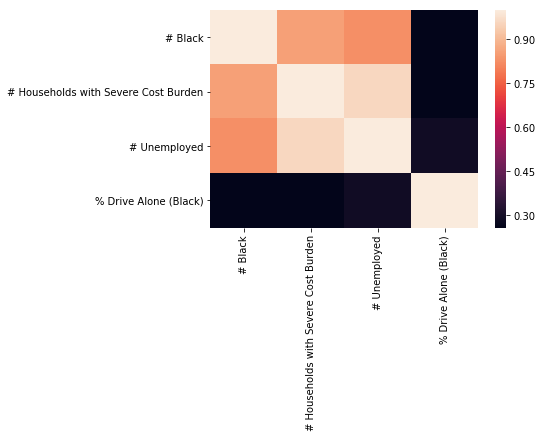

In [1194]:
sns.heatmap(X_train_val[['# Black','# Households with Severe Cost Burden', '# Unemployed','% Drive Alone (Black)' ]].corr())

Other than economic indicators, (of the top 15 features) I found the '% Drive Alone (Black)' feature most worth exploring. According to the county_health dataset, (on average) under a third of minority communities drive as their primary form of commuting to work (compared to 50% of White commuters). According to a 2013 Census report, a larger percentage (11, 10.9, and 7.7% respectively) of African Americans, Asians, and Hispanic commuters used public transportation (compared to only 3.1% of White commuters). Census Report: https://www.census.gov/programs-surveys/sis/resources/reports/automobile.html. 

Other than medical workers, nursing home staff, meatpacking industry, and correctional facilities, public transportation/transit workers have also been hit particularly hard by the coronavirus. According to the Washington Post, "at least 10,000 Metropolitan Transit Authority employees have been quarantined during the outbreak." From "Transit workers are paying a heavy price during the pandemic," May 17, 2020: https://www.washingtonpost.com/local/trafficandcommuting/transit-workers-are-paying-heavy-price-in-the-coronavirus-pandemic/2020/05/17/d7251b18-8edc-11ea-a9c0-73b93422d691_story.html. 

In [1264]:
drive_cols=[col for col in X_train.columns if '% Drive' in col and '_isna' not in col]
drive_cols

['% Drive Alone (AIAN)',
 '% Drive Alone (Asian)',
 '% Drive Alone (Black)',
 '% Drive Alone (Hispanic)',
 '% Drive Alone (White)',
 '% Drive Alone to Work']

In [1295]:
drive_df=X_train[drive_cols]
mean_drive_df=pd.DataFrame(data=drive_df.mean().sort_values(ascending=False), columns= ['Mean Percent (%)'])
px.bar(mean_drive_df, x=mean_drive_df.index, y='Mean Percent (%)', title="% Commute to Work Alone by Private Vehicle")

In [1297]:
#According to a 2013 census report, of those living in a principal city/in metro area.:
#https://www.census.gov/programs-surveys/sis/resources/reports/automobile.html
public_transportation_df=pd.DataFrame({'Percent (%)': [7.7, 10.9, 11.0, 3.1, 6.4]}, index=['Hispanic', 'Asian', 'Black', 'White', 'Other'])
px.bar(public_transportation_df, x=public_transportation_df.index, y='Percent (%)', title='% Use Public Transportation (Living in a Metro Area)')

Finally, 'residential_percent_change_from_baseline' from Google's global mobility report (i.e. staying at home) was identified by sklearn as the parameter related to county COVID-19 mortality with the highest feature importance.

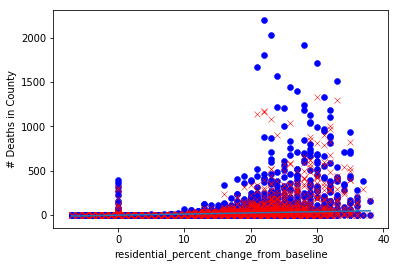

In [1268]:
import matplotlib.pyplot as plt

ax = plt.axes()
x=X_train_val['residential_percent_change_from_baseline']
y=y_train_val
y_pred=y_predict_train_val
ax.scatter(x, y, linewidth=0.5, marker='o', label='Deaths: Actual', c='b')
ax.scatter(x, y_pred, linewidth=0.5, marker='x', label='Deaths: Actual', c='r')
ax.set_xlabel('residential_percent_change_from_baseline')
ax.set_ylabel('# Deaths in County')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [1282]:
## Uncomment to plot 'residential_percent_change_from_baseline' in plotly

# ifeatures_fig = go.Figure()

# ifeatures_fig.add_trace(go.Scatter(
#         x=X_train_val['residential_percent_change_from_baseline'], y=y_train_val,
#         name='Mortality: Actual Value',
#         mode='markers',
#     ))

# ifeatures_fig.add_trace(go.Scatter(
#         x=X_train_val['residential_percent_change_from_baseline'], y=y_predict_train_val,
#         name='Mortality: Predicted Value',
#     ))

# # Set options common to all traces with fig.update_traces
# ifeatures_fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
# ifeatures_fig.update_layout(title='Residential % Change (from_baseline) vs.  Mortality',
#                                     xaxis_title=f'{col}',
#                                     yaxis_title='# Deaths (per County)',
#                       yaxis_zeroline=False, xaxis_zeroline=False
#                                )

# ifeatures_fig.show()

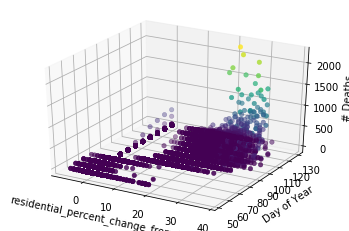

In [1269]:
ax = plt.axes(projection='3d')
x=X_train_val['residential_percent_change_from_baseline']
y=X_train_val['doy']
z=y_train_val
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)
ax.set_xlabel(col)
ax.set_ylabel('Day of Year')
ax.set_zlabel('# Deaths')
plt.show()

### Part 10: General Recommendations

Other than following the CDC guidelines (https://www.cdc.gov/coronavirus/2019-ncov/prevent-getting-sick/prevention.html), I would recommend:

* Keep social distancing! = reduction of community spread (virus transmitted via respiratory droplets)
* Government incentives for corporations to keep employees on the payroll
* Stimulus, especially for communities hit hardest economically (communities with highest unemplyment, household financial burden, and pre-existing disease prevalence)
* Limit use of public transportation, and take precautions when in use (i.e general population: use social distancing, avoid touching face-area, avoid environments with re-circulated air/open windows if possible, and wash hands frequently; local government: require wearing a mask on all public transportation, invest in making public transportation safer)
* Create incentive structure and tools for employees to work remotely